# Probabilidad y Estadística para la Inteligencia Artificial - CEIA Coh17 (UBA)

Grupo 3 - Integrantes:
* Luciano Adassus (luciano106@gmail.com)
* Ignacio Tomas	 de Pedro Mermier (idepedro@fi.uba.ar)
* Agustina Quiros (agustinaqr@gmail.com)


## **Ejercicio 1.**
Se pretende estimar los valores de producción Y (en miles de toneladas) de cierto material, en función del tiempo transcurrido X (en meses) usando los valores de la tabla:

| X     | Y   |
|-------|-----|
| 2     | 5   |
| 9     | 61  |
| 14    | 141 |
| 16    | 267 |
| 23    | 437 |

Se plantea un modelo de la forma:

$ Y = a + b x + c x^2$

Encontrar los estimadores de mínimos cuadrados para a, b y c en este
modelo.



Para obtener los coeficientes a, b y c, debemos resolver el siguiente sistema de ecuaciones

$ a*\sum_{i=1}^{N} 1 + b*\sum_{i=1}^{N} x_i + c *\sum_{i=1}^{N} x_i^2 = \sum_{i=1}^{N} y_i$

$ a*\sum_{i=1}^{N}x_i  + b*\sum_{i=1}^{N} x_i^2 + c *\sum_{i=1}^{N} x_i^3 = \sum_{i=1}^{N} x_i y_i$

$ a*\sum_{i=1}^{N}x_i^2 + b*\sum_{i=1}^{N} x_i^3 + c *\sum_{i=1}^{N} x_i^4 = \sum_{i=1}^{N} x_i^2 y_i$


Donde *N* es el total de muestras, *x_i* el resultado de las observaciones de X e *y_i* el resultado de las observaciones de Y.

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
x_data = [2, 9, 14, 16, 23]
y_data = [5, 61, 141, 267, 437]

x_name = 'X'
y_name = 'Y'

data = {x_name: x_data, y_name: y_data}
df = pd.DataFrame(data)
print(df)


x = df['X'].to_numpy()
y = df['Y'].to_numpy()

n = len(x)

sum_x = np.sum(x)
sum_y = np.sum(y)

sum_x2 = np.sum(x*x)
sum_x3 = np.sum(x*x*x)
sum_x4 = np.sum(x*x*x*x)

sum_xy = np.sum(x*y)
sum_x2y = np.sum(x*x*y)

print(' ')
print('Resultado Sumatorias')
print(' ')
print('N:', n)
print('Sum_x: ',sum_x)
print('Sum_x^2: ', sum_x2)
print('Sum_x^3: ', sum_x3)
print('Sum_x^4: ', sum_x4)
print('Sum_y: ', sum_y)
print('Sum_xy: ', sum_xy)
print('Sum_x2y: ',sum_x2y)

    X    Y
0   2    5
1   9   61
2  14  141
3  16  267
4  23  437
 
Resultado Sumatorias
 
N: 5
Sum_x:  64
Sum_x^2:  1066
Sum_x^3:  19744
Sum_x^4:  390370
Sum_y:  911
Sum_xy:  16856
Sum_x2y:  332122


> Utilizando la funcion linalg.solve de numpy, resolvermos el sistema de ecuaciones y obtenemos los coeficientes


In [ ]:
a = np.array([[n,sum_x,sum_x2],[sum_x,sum_x2,sum_x3],[sum_x2,sum_x3,sum_x4]])
b = np.array([sum_y,sum_xy,sum_x2y])
coef = np.linalg.solve(a,b)

print("Sistema de ecucaciones: ", "\n", a, b, "\n")
print("Coeficientes: ", coef)

Sistema de ecucaciones:  
 [[     5     64   1066]
 [    64   1066  19744]
 [  1066  19744 390370]] [   911  16856 332122] 

Coeficientes:  [-7.97276265  2.0542619   0.76865952]


Coeficientes:

$ a = -7.97$

$ b = 2.05 $

$ c = 0.76 $

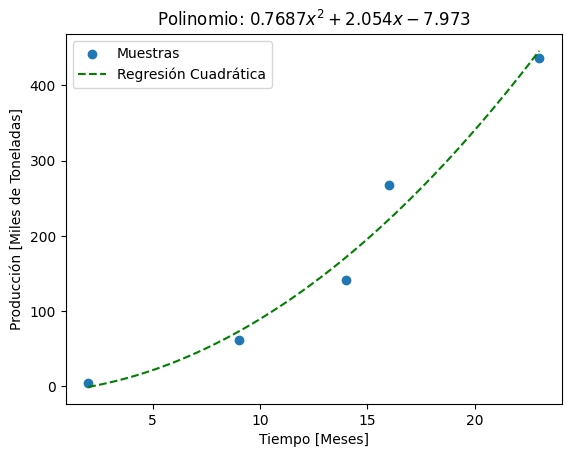

In [ ]:
# Genero la expresion de un polinomio de orden 2 con los coeficienes que obtuvimos anteriormente
quadratic_fit = np.poly1d([coef[2],coef[1],coef[0]])

# Valores para la línea de regresión
x_range = np.linspace(min(x), max(x), 100)

# Gráficos
plt.scatter(x, y, label='Muestras')
plt.plot(x_range, quadratic_fit(x_range), label=f'Regresión Cuadrática', color='green', linestyle='--')
plt.xlabel('Tiempo [Meses]')
plt.ylabel('Producción [Miles de Toneladas]')
plt.title(r'Polinomio: $0.7687x^2 + 2.054x - 7.973$')
plt.legend()
plt.show()

## **Ejercicio 2.**
Don Francisco es un pequeño comerciante de barrio posee un supermercado de barrio, con el que sostiene su familia.
Uno de sus hijos, Matıas, quien recien inicia a cursar la Especializacion en Inteligencia Artificial del LSE de la UBA, le propone hacer un analisis de las ventas durante el año anterior, con el fin de hacer pronosticos para el año siguiente, lo que a don Francisco le parece buena idea y le plantea algunas inquietudes:

a) Don Francisco necesita saber en que mes se puede tomar unas vacaciones. Tambien necesita saber en que mes las ventas seran mejores para embarcarse en una inversion importante. Por ello le pregunta a Matıas, ¿como se comportan las ventas en cada mes?

b) De forma similar a la anterior, don Francisco necesita reacomodar los horarios de atencion de sus supermercados a lo largo de la semana; tambien debe decidir en que dıas debe contratar mas empleados y en que dıas podrıa contratar menos. Por ello pregunta, ¿como se comportan las ventas en cada dıa de la semana?
Don Francisco le entrega a Matıas el cuaderno donde tiene registrado el valor total de sus ventas en cada dıa del ano. Con esta informacion, Matıas construye una tabla en la cual la primera columna corresponde a la fecha y la segunda corresponde al monto de las ventas, en dolares para evitarse dolores de cabeza con la inflacion. Matıas no se siente muy seguro de la tarea a realizar, ası que les pide ayuda a ustedes para abordar el problema.

A partir del archivo de datos correspondiente a su grupo, determine:
- a) Funciones empıricas de distribucion y aproximaciones a las funciones de densidad para dichas distribuciones, para las ventas durante cada uno de los meses del año.
- b) Funciones empıricas de distribucion y aproximaciones a las funciones de densidad para dichas distribuciones, para las ventas por cada d ıa de la semana.



Tenemos un archivo excel llamado **Datos_segundo_punto_17Co2024_Grupo3.xlsx** con las siguientes columnas:

- `fecha`: La fecha de la venta (en formato YYYY-MM-DD).
- `ventas`: El monto de las ventas en dólares.
  
Primero, cargaremos los datos y los prepararemos para el análisis :

In [ ]:
# librerías necesarias
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gaussian_kde
import os

In [ ]:
# Verificar si el archivo existe (el archivo deberia estar en el mismo directorio mismo lugar que el file de jupiter)
file_path = 'Datos_segundo_punto_17Co2024_Grupo3.xlsx'
if not os.path.exists(file_path):
    print(f"Error: El archivo {file_path} no se encuentra en el directorio actual.")
else:
    # Cargar los datos
    data = pd.read_excel(file_path)

    # Convertir la columna 'Fecha' a tipo datetime
    data['Fecha'] = pd.to_datetime(data['Fecha'])

    # Extraer el mes y el día de la semana de la fecha
    data['Mes'] = data['Fecha'].dt.month
    data['DiaSemana'] = data['Fecha'].dt.dayofweek

    # Mapeo de los días de la semana
    dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    data['NombreDiaSemana'] = data['DiaSemana'].map(lambda x: dias_semana[x])

### **Análisis de las Ventas por Mes**


Para cada mes, calcularemos las **funciones empíricas de distribución (ECDF)** y **aproximaciones a las funciones de densidad (KDE)**.


In [ ]:
# Función para generar gráficos ECDF y KDE
def generar_graficos_ecdf_kde(df, columna, etiquetas, titulo_ecdf, titulo_kde):
    # Paleta de colores
    colores = plt.get_cmap('tab20').colors

    # ECDF
    plt.figure(figsize=(14, 8))
    for idx, valor in enumerate(df[columna].unique()):
        subset = df[df[columna] == valor]['Ventas']
        ecdf = ECDF(subset)
        plt.plot(ecdf.x, ecdf.y, label=f'{etiquetas[valor-1] if columna == "Mes" else etiquetas[valor]}', color=colores[idx % len(colores)])
    plt.title(titulo_ecdf)
    plt.xlabel('Ventas ($)')
    plt.ylabel('ECDF')
    plt.legend()
    plt.show()

    # KDE
    plt.figure(figsize=(14, 8))
    for idx, valor in enumerate(df[columna].unique()):
        subset = df[df[columna] == valor]['Ventas']
        kde = gaussian_kde(subset)
        x_vals = np.linspace(subset.min(), subset.max(), 1000)
        plt.plot(x_vals, kde(x_vals), label=f'{etiquetas[valor-1] if columna == "Mes" else etiquetas[valor]}', color=colores[idx % len(colores)])
    plt.title(titulo_kde)
    plt.xlabel('Ventas ($)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()


### **Gráficos para ventas por mes**

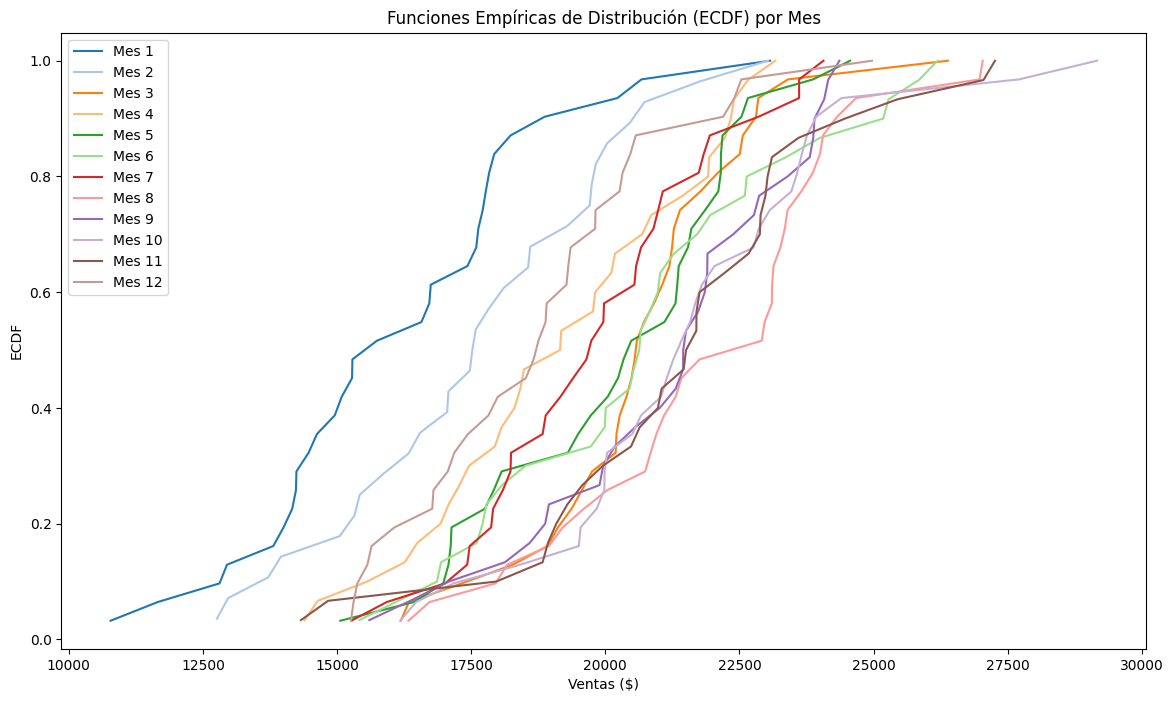

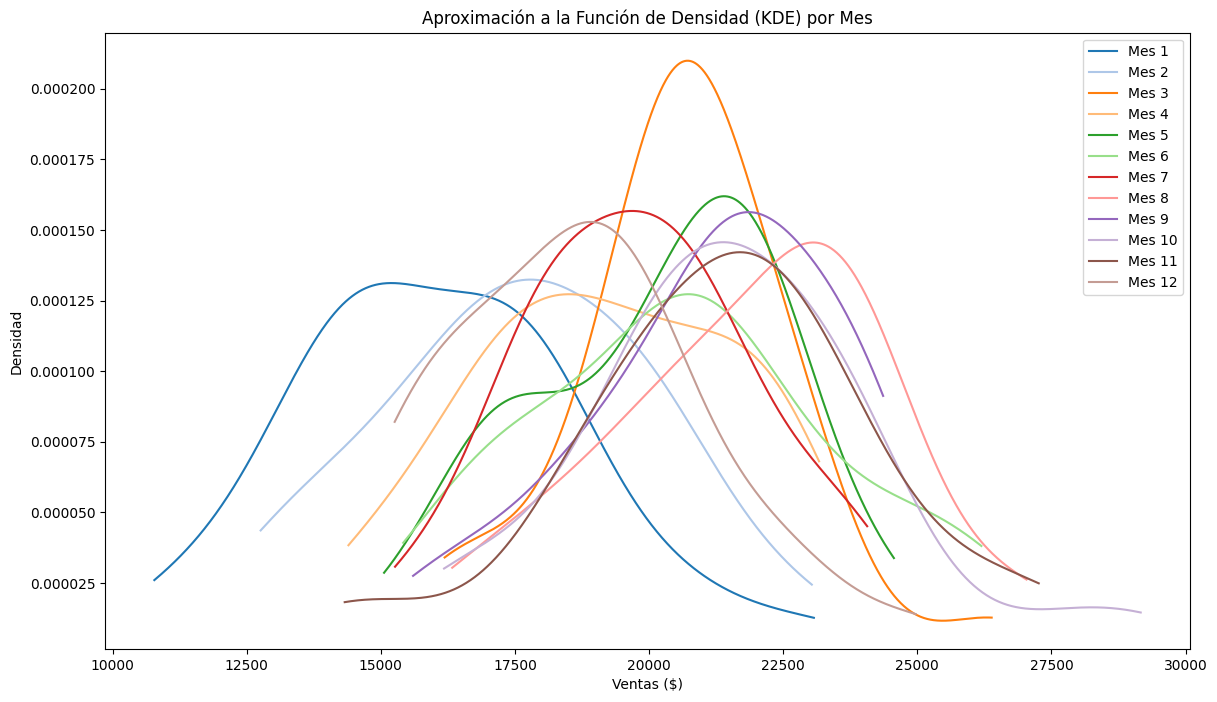

In [ ]:
generar_graficos_ecdf_kde(data, 'Mes',
                          [f'Mes {i}' for i in range(1, 13)],
                          'Funciones Empíricas de Distribución (ECDF) por Mes',
                          'Aproximación a la Función de Densidad (KDE) por Mes')

**Comportamiento de las Ventas por Mes**

Enero
- ECDF: La función de enero satura rápidamente, indicando que la mayoría de las ventas se encuentra en el rango bajo. Esto sugiere que las ventas en enero son generalmente bajas.
- KDE: La densidad de ventas es más alta en valores bajos, confirmando que las ventas en enero tienen una media baja y son menos consistentes.

Febrero
- ECDF: Similar a enero, la función de febrero también satura rápidamente, lo que indica que las ventas están mayormente en el rango bajo.
- KDE: La densidad de ventas en febrero es alta en valores bajos, aunque ligeramente más alta que en enero, indicando ventas bajas pero con una ligera tendencia a ser un poco más altas que en enero.

Marzo
- ECDF: La función de marzo muestra una subida más gradual comparada con enero y febrero, indicando una mayor distribución de las ventas en valores medios.
- KDE: Marzo tiene una mayor densidad en un rango más estrecho de ventas, lo que sugiere ventas más constantes y medianamente altas.

Abril
- ECDF: Sube de manera más uniforme, indicando una distribución más amplia de las ventas.
- KDE: La densidad de ventas en abril es menor y más dispersa, sugiriendo que las ventas en este mes son más variables y menos predecibles.

Mayo
- ECDF: La función de mayo muestra un ascenso uniforme, similar a marzo, indicando consistencia en las ventas.
- KDE: Mayo tiene una alta densidad en valores medios, lo que sugiere que las ventas son consistentes y medianamente altas.

Junio
- ECDF: Junio sube de manera uniforme pero con una inclinación hacia valores medios-altos.-
- KDE: La densidad de ventas en junio es alta en el rango medio-alto, lo que sugiere ventas moderadamente altas y consistentes.

Julio
- ECDF: Similar a marzo y mayo, la de julio muestra una subida uniforme, indicando consistencia en las ventas.
- KDE: Julio presenta una alta densidad en el rango medio, similar a marzo, sugiriendo ventas consistentes y medianamente altas.

Agosto
- ECDF: La funcion de agosto sube de manera más gradual, indicando una mayor variabilidad en las ventas.
- KDE: Agosto muestra una mayor dispersión de las ventas con una densidad menor, lo que sugiere ventas más variables y menos predecibles.

Septiembre
- ECDF: La función de septiembre muestra un patrón uniforme, similar a mayo y julio, indicando consistencia en las ventas.
- KDE: La densidad de ventas en septiembre es alta en el rango medio-bajo, lo que sugiere ventas consistentes pero un poco más bajas que en otros meses como mayo y julio.

Octubre
- ECDF: Octubre sube de manera uniforme, indicando consistencia en las ventas.
- KDE: Octubre tiene una alta densidad en valores medios, sugiriendo que las ventas son consistentes y medianamente altas.

Noviembre
- ECDF: La función de noviembre sube de manera más gradual, indicando una mayor variabilidad en las ventas.
- KDE: Noviembre muestra una mayor variabilidad con una densidad menor, lo que sugiere ventas más variables y menos predecibles.

Diciembre
- ECDF: Diciembre muestra una subida rápida en el rango medio-alto, indicando que muchas ventas se encuentran en este rango.
- KDE: Diciembre tiene una alta densidad en el rango medio-alto, lo que sugiere que es uno de los meses con mejores ventas.


### **Gráficos para ventas por día de la semana**

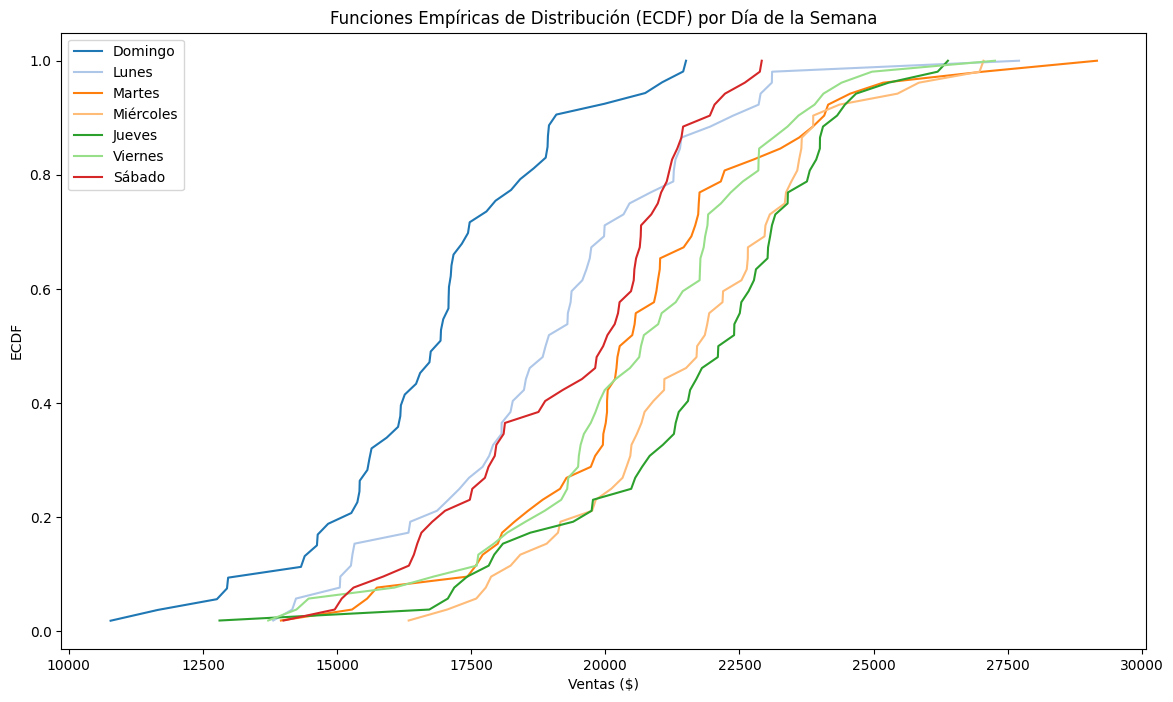

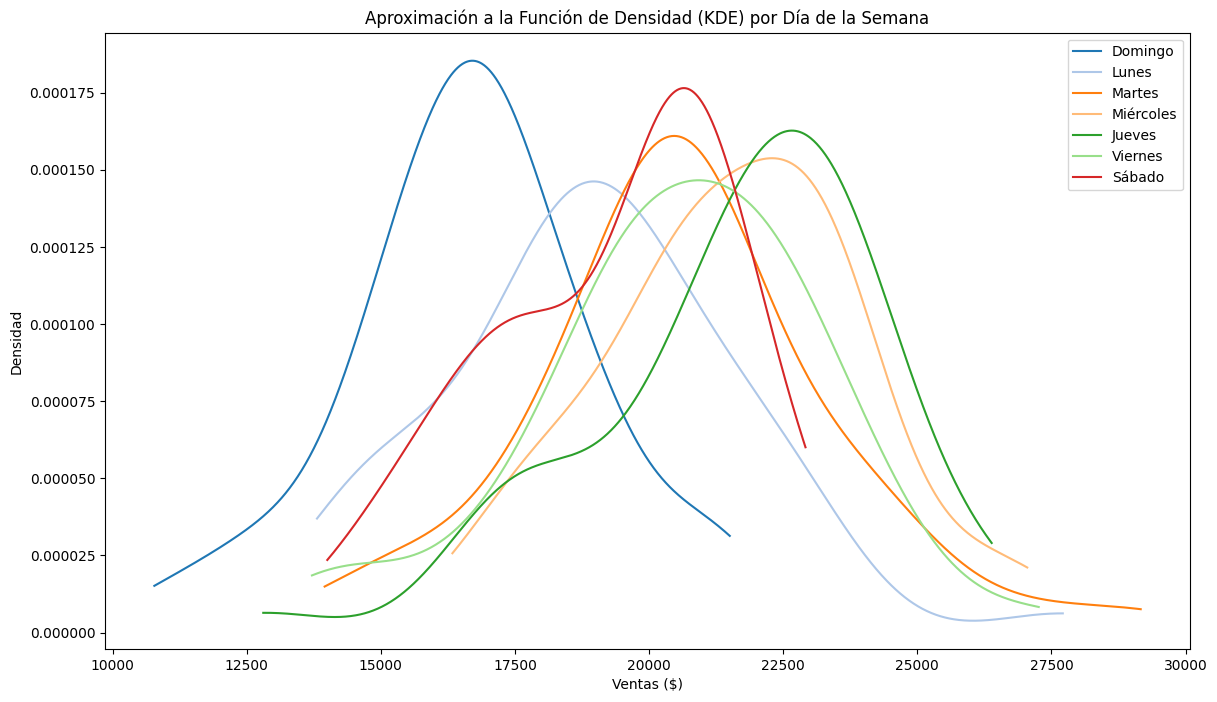

In [ ]:
generar_graficos_ecdf_kde(data, 'DiaSemana',
                          [f'{i}' for i in dias_semana],
                          'Funciones Empíricas de Distribución (ECDF) por Día de la Semana',
                          'Aproximación a la Función de Densidad (KDE) por Día de la Semana')

**Comportamiento de las Ventas por Día de la Semana**

Lunes:
- KDE: Las ventas los lunes muestran una densidad alta en el rango medio de valores, lo que indica que las ventas son relativamente consistentes. Esto significa que los lunes tienen ventas regulares y predecibles sin grandes picos ni caídas.
- ECDF: La función para los lunes sube de manera uniforme, indicando que la mayoría de los días tienen ventas dentro del rango medio sin muchos valores extremos.

Martes:
- KDE: Similar a los lunes, los martes presentan una densidad alta en el rango medio, sugiriendo que las ventas son consistentes y regulares. Los martes también tienden a tener ventas predecibles y sin grandes variaciones.
- ECDF: La curva de los martes muestra un patrón uniforme, lo que refuerza la consistencia en las ventas sin valores extremos.

Miércoles:
- KDE: Los miércoles tienen una densidad de ventas más moderada y una distribución más dispersa en comparación con lunes y martes. Esto indica que las ventas son menos predecibles y más variables.
- ECDF: La función para los miércoles sube de manera menos uniforme, lo que refleja la mayor variabilidad en las ventas. Algunos miércoles tienen ventas altas, mientras que otros tienen ventas significativamente más bajas.

Jueves:
- KDE: Las ventas los jueves son notablemente más altas con una densidad concentrada en el rango medio-alto. Esto sugiere que los jueves son días fuertes en términos de ventas.
- ECDF: La curva para los jueves muestra un ascenso rápido en el rango medio-alto, indicando que muchos días jueves tienen ventas altas. Esto hace de los jueves uno de los días con mejores ventas.

Viernes:
- KDE: Los viernes presentan una alta densidad de ventas en el rango medio-alto, similar a los jueves. Esto sugiere que los viernes son también días fuertes en términos de ventas.
- ECDF: La función para los viernes asciende rápidamente en el rango medio-alto, lo que confirma que los viernes tienen ventas significativamente altas y consistentes.

Sábado:
- KDE: Las ventas los sábados son consistentes, con una alta densidad en valores medios. Esto indica que, aunque no son tan altas como los jueves y viernes, las ventas los sábados son bastante estables.
ECDF: La curva para los sábados muestra un patrón uniforme, sugiriendo que la mayoría de los sábados tienen ventas dentro de un rango predecible sin grandes fluctuaciones.

Domingo:
- KDE: Los domingos tienen una distribución más amplia y una menor densidad de ventas, lo que indica una mayor variabilidad. Esto sugiere que las ventas los domingos son menos predecibles y pueden ser bajas.
- ECDF: La función para los domingos asciende más lentamente, reflejando la mayor variabilidad en las ventas. Algunos domingos pueden tener ventas moderadas, pero muchos otros tienen ventas bajas.

**Resumen**
- Mejor mes para vacaciones: Abril y Noviembre presentan una menor densidad de ventas y mayor variabilidad, por lo que pueden ser buenos meses para tomar vacaciones.
  
- Mejor mes para inversiones: Diciembre y Mayo muestran una alta densidad en el rango medio-alto de ventas, sugiriendo que son los mejores meses para inversiones importantes.
  
- Días con mayores ventas: Jueves y Viernes tienen la mayor densidad de ventas en el rango medio-alto, por lo que estos días son los mejores para maximizar las ventas.

- Días con menores ventas: Domingo presenta la menor densidad de ventas, sugiriendo que es el día con menores ventas y potencialmente menor necesidad de personal.


Para reacomodar los horarios de atención y la contratación de empleados, debemos enfocarnos en los días de la semana con mayores y menores ventas. Basándonos en el análisis anterior, podemos hacer las siguientes recomendaciones:

**Reacomodar Horarios de Atención**

Días con Menores Ventas:

- Domingo: Con una menor densidad de ventas, puede ser un día adecuado para reducir las horas de atención o incluso cerrar temprano.

- Miércoles: Presenta una mayor dispersión y menor densidad de ventas comparado con otros días, por lo que también se podría considerar ajustar los horarios de atención.

Días con Mayores Ventas:

- Jueves y Viernes: Con la mayor densidad de ventas en el rango medio-alto, estos días son cruciales para maximizar la disponibilidad y el servicio al cliente. Extender las horas de atención en estos días puede ser beneficioso.
  
**Contratación de Empleados**

Días con Mayor Necesidad de Empleados:

- Jueves y Viernes: Debido a las altas ventas, es recomendable contratar más empleados estos días para manejar el incremento en la demanda y asegurar una atención eficiente al cliente.

Días con Menor Necesidad de Empleados:

- Domingo: Con las ventas más bajas, se puede reducir la cantidad de empleados, optimizando así los costos de personal.
- Miércoles: Similar al domingo, la menor densidad de ventas permite una reducción en el número de empleados necesarios.
  


**Plan de Acción Sugerido**

Horarios de Atención:

- Lunes, Martes, Miércoles: Mantener horarios regulares, con posibilidad de reducir horas en miércoles.
- Jueves y Viernes: Extender las horas de atención para maximizar las ventas durante estos días pico.
- Sábado: Mantener horarios regulares, ya que las ventas son consistentes.
- Domingo: Reducir las horas de atención, posiblemente cerrando más temprano.

Contratación de Empleados:

- Lunes, Martes: Mantener una dotación regular de empleados.
- Miércoles: Reducir la cantidad de empleados, optimizando los costos.
- Jueves y Viernes: Aumentar la dotación de empleados para manejar el incremento en la demanda.
- Sábado: Mantener una dotación regular de empleados.
- Domingo: Reducir la cantidad de empleados, ya que la demanda es menor.



> Estas recomendaciones deberían proporcionar una base sólida para que Don Francisco optimice los recursos del supermercado, mejorando la eficiencia operativa y asegurando una atención adecuada a los clientes durante los días de mayor afluencia.